In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [ ]:
 df_train.shape

(690, 16)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,44.25,11.00,y,p,d,v,1.500,t,f,0,f,s,0,0,0
1,b,23.58,0.46,y,p,w,v,2.625,t,t,6,t,g,208,347,0
2,b,23.92,1.50,u,g,d,h,1.875,t,t,6,f,g,200,327,1
3,b,33.17,1.00,u,g,x,v,0.750,t,t,7,t,g,340,4071,1
4,b,48.33,12.00,u,g,m,v,16.000,t,f,0,f,s,110,0,1


In [ ]:
df_test.shape

(136, 16)

In [ ]:
df_train.describe()

,A2,A3,A8,A11,A14,A15,A16
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [ ]:
df_train.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

For categorical data null values is generally replaced by most frequent categories.

In [ ]:
categories = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

for cat in categories:
  df_train[cat].fillna(df_train[cat].mode()[0],inplace=True)

In [ ]:
df_train.isna().sum()

A1      0
A2     12
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Plotting histogram for the numerical features which have null values

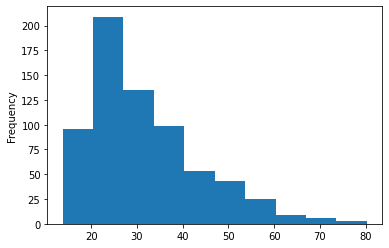

In [ ]:
df_train.A2.plot.hist()

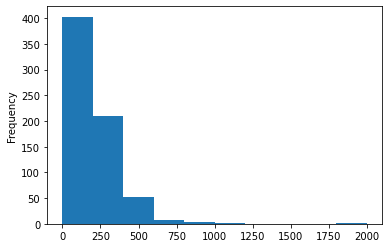

In [ ]:
df_train.A14.plot.hist()

From above two histogram we can say that both the plots are left skewed , therefore replacing null values by mean will become biased .
In this scenario , median should be taken into account. 

In [ ]:
continuous = ['A2','A3','A8','A11','A14','A15']
for conti in continuous:
  df_train[conti].fillna(df_train[conti].median(),inplace=True)

In [ ]:
###All Missing values handled
df_train.isna().sum() 

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

Observing Outliers for the numerical features.

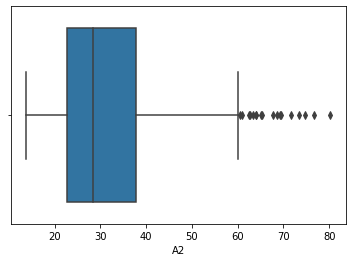

In [ ]:
sns.boxplot('A2',data=df_train)

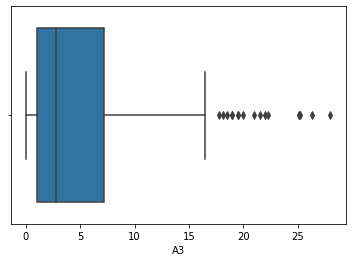

In [ ]:
sns.boxplot('A3',data=df_train)

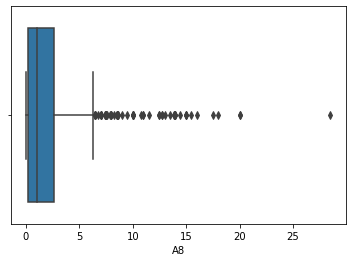

In [ ]:
sns.boxplot('A8',data=df_train)

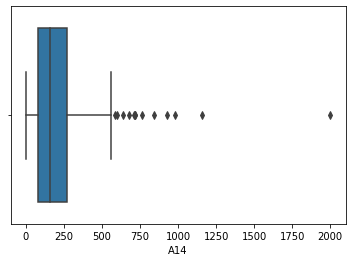

In [ ]:
sns.boxplot('A14',data=df_train)

From Above all box plot we can clearly conlcude that there are some outlier in it. So to make our model more robust we have to handle those outlier also.

Handling Outlier

In [ ]:
###There are many outliers in the dataset ,so dropping all rows having outlier is not the good option
###Therefore calculate IQR and upper bound ,lower boundary , and replacing outliers.. 
def handling_outlier(df,lt):
  for var in lt:
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    extreme_upper = df[var].quantile(0.75) + IQR*1.5
    extreme_lower = df[var].quantile(0.25) - IQR*1.5
    df[var] = np.where(df[var]<extreme_lower,extreme_lower,df[var])
    df[var] = np.where(df[var]>extreme_upper,extreme_upper,df[var])

In [ ]:
lt = ['A2','A3','A8','A14','A15','A11']
handling_outlier(df_train,lt)

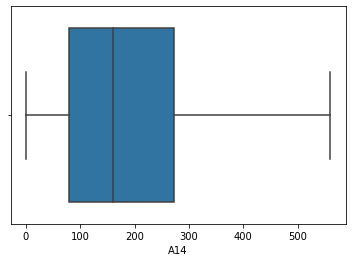

In [ ]:
sns.boxplot('A14',data=df_train) ### Outlier captured

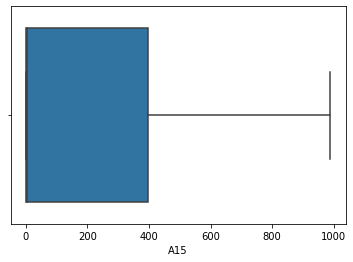

In [ ]:
sns.boxplot('A15',data=df_train) ### Outlier captured

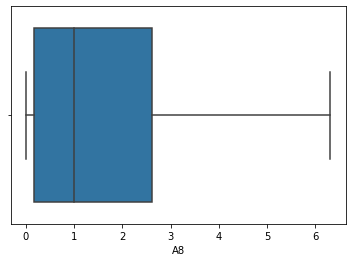

In [ ]:
sns.boxplot('A8',data=df_train) ### Outlier captured

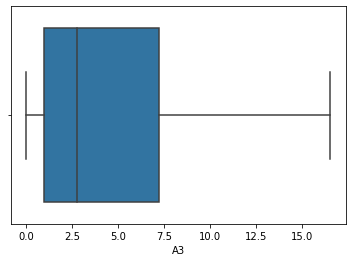

In [ ]:
sns.boxplot('A3',data=df_train) ### Outlier captured

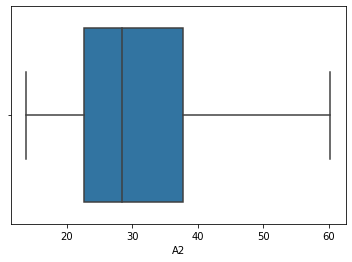

In [ ]:
sns.boxplot('A2',data=df_train) ### Outlier captured

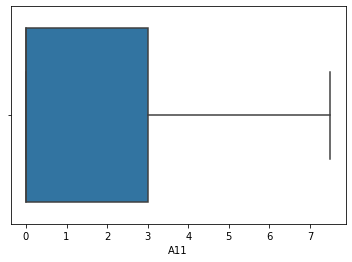

In [ ]:
sns.boxplot('A11',data=df_train) ### Outlier captured

When we plot correlation heatmap to observe the correlation between the columns.From the plot we can observe that there's not much correlation between the columns so columns should be dropped.

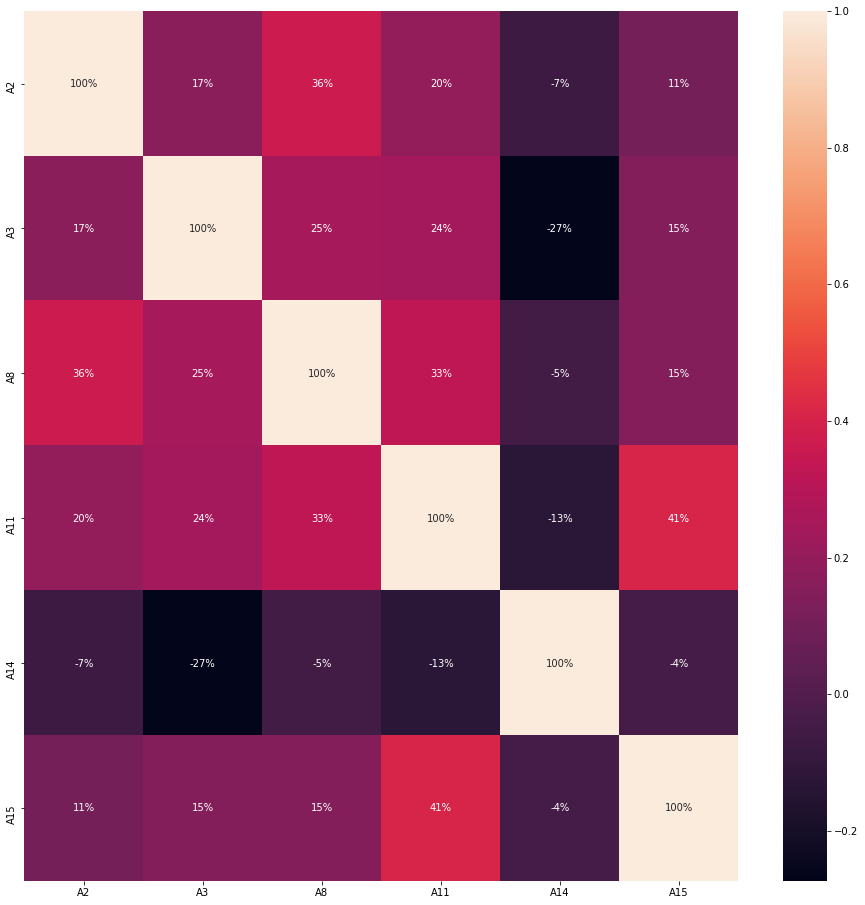

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train[continuous].corr(),annot=True,fmt=".0%")

In [ ]:
###Finding correlation between categorical and target value to find the similarity between them.
###Analyzed the relationship between all of them (A1, A4, A5, A6, A7, A9, A10, A12, A13) and getting approved (A16) using a looping one-way Chi Squared Test
from scipy.stats import chisquare 

categorical_feats = [df_train.A1, df_train.A4, df_train.A5, df_train.A6, df_train.A7, df_train.A9, df_train.A10, df_train.A12, df_train.A13]

crosstabs = [pd.crosstab(df_train.A16, feat) for feat in categorical_feats]

for crosstab in crosstabs:
  print(crosstab)
  print(chisquare(crosstab,axis=None))

A1     a    b
A16          
0    112  271
1     98  209
Power_divergenceResult(statistic=117.3623188405797, pvalue=2.8540065117614246e-25)
A4   l    u    y
A16             
0    0  265  118
1    2  260   45
Power_divergenceResult(statistic=647.2, pvalue=1.2755390935787815e-137)
A5     g  gg    p
A16              
0    265   0  118
1    260   2   45
Power_divergenceResult(statistic=647.2, pvalue=1.2755390935787815e-137)
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
0    35  80  12  23  11  46  45  7  37  22  27  1  31   6
1    19  66  29   7  14   7  14  3  14  16  51  2  33  32
Power_divergenceResult(statistic=422.53333333333336, pvalue=1.2637391346222305e-72)
A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
0    34   4  49  51  5  2  1  235  2
1    25   2   8  87  3  2  1  173  6
Power_divergenceResult(statistic=1910.191304347826, pvalue=0.0)
A9     f    t
A16          
0    306   77
1     2

One Hot encoding

In [ ]:
#One hot encoding for train dataset
train_dummy = pd.get_dummies(df_train[categories])
df_train = pd.concat([df_train, train_dummy], axis = 1)

In [ ]:
#one hot encoding for test dataset
test_dummy = pd.get_dummies(df_test[categories])
df_test = pd.concat([df_test, test_dummy], axis = 1)

In [ ]:
###Dropping the categorical values whose one hot encoding to be done on training and test dataset.
df_train.drop(categories, axis=1, inplace=True)
df_test.drop(categories, axis=1, inplace=True)

In [ ]:
print("Training Dataset : ")
print(df_train.head())
print("Testing Dataset : ")
print(df_test.head())

Training Dataset : 
      A2     A3    A8  A11    A14  ...  A12_f  A12_t  A13_g  A13_p  A13_s
0  30.83  0.000  1.25  1.0  202.0  ...      1      0      1      0      0
1  58.67  4.460  3.04  6.0   43.0  ...      1      0      1      0      0
2  24.50  0.500  1.50  0.0  280.0  ...      1      0      1      0      0
3  27.83  1.540  3.75  5.0  100.0  ...      0      1      1      0      0
4  20.17  5.625  1.71  0.0  120.0  ...      1      0      0      0      1

[5 rows x 47 columns]
Testing Dataset : 
      A2     A3      A8  A11  A14  ...  A10_t  A12_f  A12_t  A13_g  A13_s
0  44.25  11.00   1.500    0    0  ...      0      1      0      0      1
1  23.58   0.46   2.625    6  208  ...      1      0      1      1      0
2  23.92   1.50   1.875    6  200  ...      1      1      0      1      0
3  33.17   1.00   0.750    7  340  ...      1      0      1      1      0
4  48.33  12.00  16.000    0  110  ...      0      1      0      0      1

[5 rows x 41 columns]


In [ ]:
print("Shape of training data set after one hot encoding :",df_train.shape)
print("Shape of test data set after one hot encoding :",df_test.shape)
###Number of features in test and train dataset differs.

Shape of training data set after one hot encoding : (690, 47)
Shape of test data set after one hot encoding : (136, 41)


In [ ]:
###We can see that number of features differ there we have to add zeros for the extra columns added in the test data
missing_cols = set(df_train.columns) - set(df_test.columns) 
for col in missing_cols:
    df_test[col] = 0

###For performing better column of train and test should be in the same order
df_test = df_test[df_train.columns]

In [ ]:
df_train.A16.value_counts() ###Here we can observe that target values are balanced

0    383
1    307
Name: A16, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


y = df_train['A16'].values
x = df_train.drop(['A16'], axis = 1)

###Splitting the training dataset into train and validation data to check how our model trained by checking it with validation accuracy 
###and tune the model accordingly to perform better for test dataset.
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=0)
print("Shape of training dataset: ",x_train.shape, y_train.shape)
print("Shape of validation dataset: ",x_validation.shape, y_validation.shape)



Y_test = df_test['A16'].values
X_test = df_test.drop(['A16'], axis = 1)
print("Shape of test dataset: ",X_test.shape, Y_test.shape)

Shape of training dataset:  (483, 46) (483,)
Shape of validation dataset:  (207, 46) (207,)
Shape of test dataset:  (136, 46) (136,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)


###After checking with all different algorithms I found that with below two model is giving good test accuracy.
###Using Randomized SearchCV for hyper parameter tuning after selecting best parameters.
params1 = {
    'max_depth':[20],
    'n_estimators':[10],
    'criterion':['entropy'],
    'random_state':[0]
}
model1 = RandomizedSearchCV(RandomForestClassifier(),params1, cv=5, scoring = 'accuracy',verbose=2)

params2 = {
    'n_estimators':[500],
    'num_leaves':[31],
    'max_depth':[3]
}
model2 = RandomizedSearchCV(LGBMClassifier(), params2, scoring='accuracy', cv=5,verbose=2)


model = model2
model.fit(x_train, y_train)

print("\n")

###Validation accuracy for hyper tuning models
y_pred_validation = model.predict(x_validation)
print('Validation set Accuracy:', accuracy_score(y_validation,y_pred_validation))
print(confusion_matrix(y_validation, y_pred_validation))
print(classification_report(y_validation,y_pred_validation))

print("\n")

###Test accuracy
y_pred = model.predict(X_test)
print('Test set Accuracy:', accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] num_leaves=31, n_estimators=500, max_depth=3 ....................
[CV] ..... num_leaves=31, n_estimators=500, max_depth=3, total=   0.1s
[CV] num_leaves=31, n_estimators=500, max_depth=3 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... num_leaves=31, n_estimators=500, max_depth=3, total=   0.1s
[CV] num_leaves=31, n_estimators=500, max_depth=3 ....................
[CV] ..... num_leaves=31, n_estimators=500, max_depth=3, total=   0.1s
[CV] num_leaves=31, n_estimators=500, max_depth=3 ....................
[CV] ..... num_leaves=31, n_estimators=500, max_depth=3, total=   0.1s
[CV] num_leaves=31, n_estimators=500, max_depth=3 ....................
[CV] ..... num_leaves=31, n_estimators=500, max_depth=3, total=   0.1s


Validation set Accuracy: 0.8599033816425121
[[97 20]
 [ 9 81]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       117
           1       0.80      0.90      0.85        90

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



Test set Accuracy: 0.9926470588235294
[[82  0]
 [ 1 53]]
              precision    recall  f1-score   suppor

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
